# OWOLABI TOLANI CELINE PROJECT
**Predicting Diabetes Risk using Machine Learning**

In this project, we'll compare different models and use model with the highest Accuracy


In [1]:
#importing Librariesimport numpy as np   
## so that output would be same
import numpy as np 
np.random.seed(42) 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
## our plot lies on the same notebook#models
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#Evaluation
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#for warning
from scikitplot.metrics import plot_roc_curve
from warnings import filterwarnings
## To remove any kind of warning
filterwarnings("ignore")  

# Load Dataset

In [44]:
data = pd.read_csv("celine_diabetes.csv")

# Display some methods of the data

In [3]:
print(data.shape)  ### Return the shape of data 
print(data.ndim)   ### Return the n dimensions of data
print(data.size)   ### Return the size of data 
print(data.isna().sum())  ### Returns the sum fo all na values
print(data.info())  ### Give concise summary of a DataFrame

(768, 9)
2
6912
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    

In [4]:
# print the first five 5 rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# getting the Statistical measure of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Corr
data.corr().style.background_gradient(cmap="Blues")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
# count the Outcome Colum
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
# Compare and visualise the Some columns from the dataset

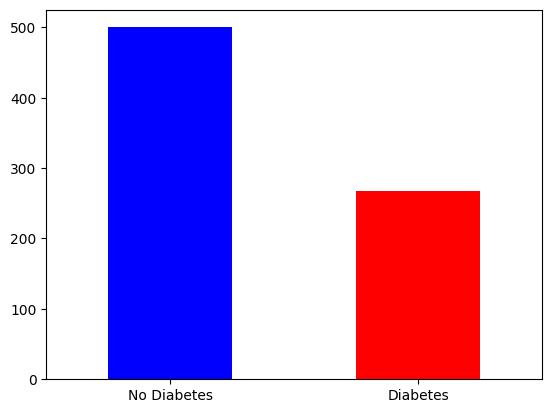

In [9]:
data["Outcome"].value_counts().plot(kind="bar",color=["blue","red"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

In [10]:
# Comparing Glucose with the Outcome

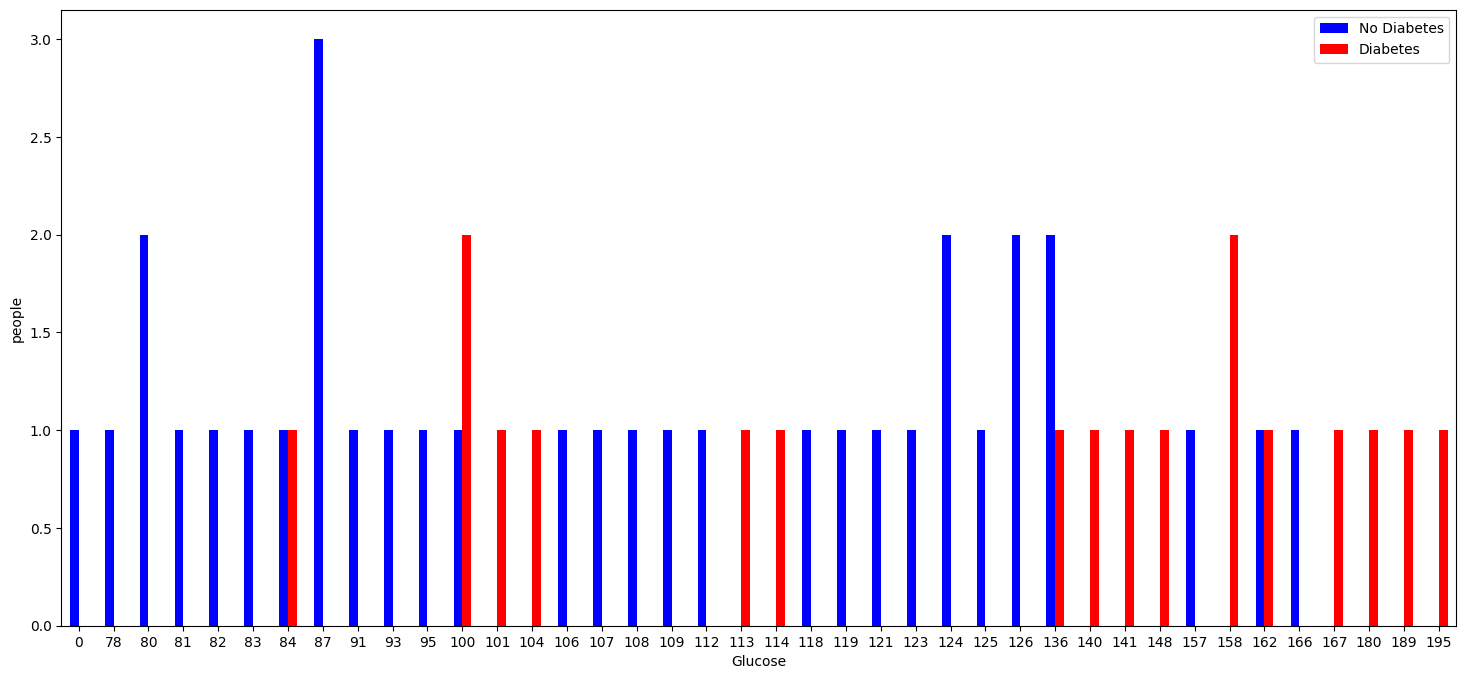

In [11]:
pd.crosstab(data.Glucose[::15],data.Outcome).plot(kind="bar",figsize=(18,8),color=["blue","red"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

In [12]:
#Blood Pressure and age of entries who have diabetes

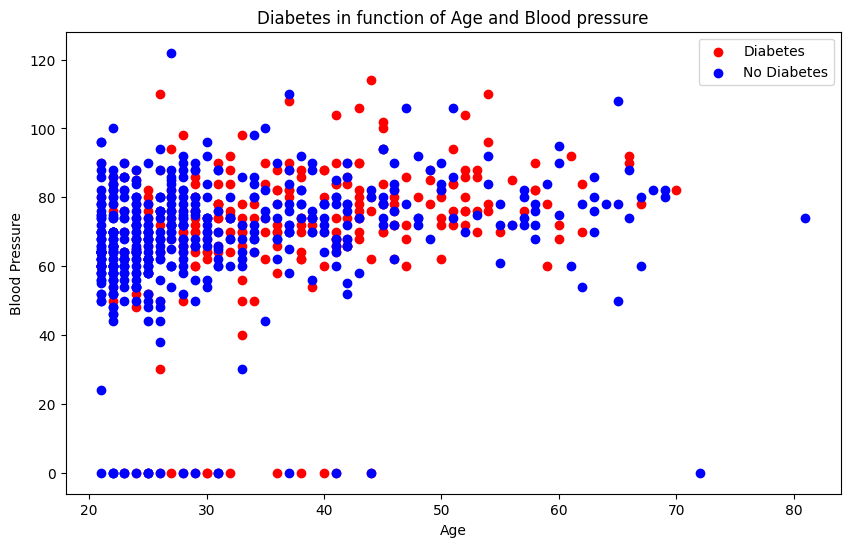

In [13]:
plt.figure(figsize=(10,6))# Scatter with positive example
plt.scatter(data.Age[data.Outcome==1],data.BloodPressure[data.Outcome==1],c="Red");# Scatter with negative example
plt.scatter(data.Age[data.Outcome==0],data.BloodPressure[data.Outcome==0],c="blue");# Add some helpful info
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

In [14]:
# Histogram of all coloumns when the Outcome is 0( has Diabetes)

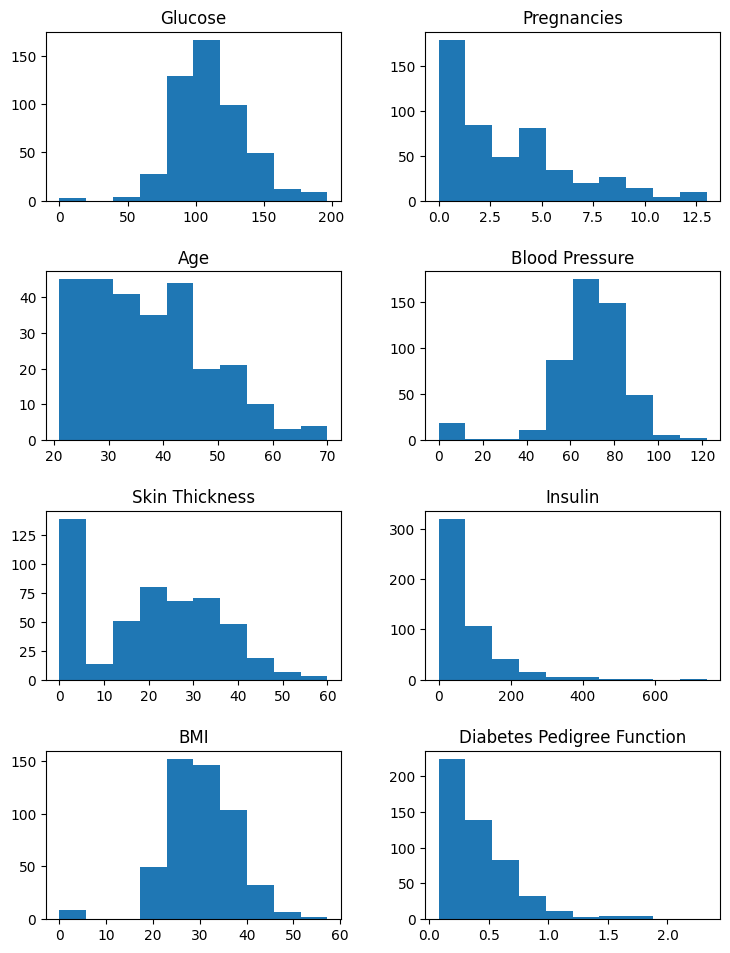

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(data.Glucose[data.Outcome==0]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==0]);
ax[1,0].set_title('Age')
ax[1,0].hist(data.Age[data.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(data.BloodPressure[data.Outcome==0]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(data.SkinThickness[data.Outcome==0]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(data.Insulin[data.Outcome==0]);
ax[3,0].set_title('BMI')
ax[3,0].hist(data.BMI[data.Outcome==0]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(data.DiabetesPedigreeFunction[data.Outcome==0]);

In [16]:
# Histogram of all coloumns when the Outcome is 1( has Diabetes)

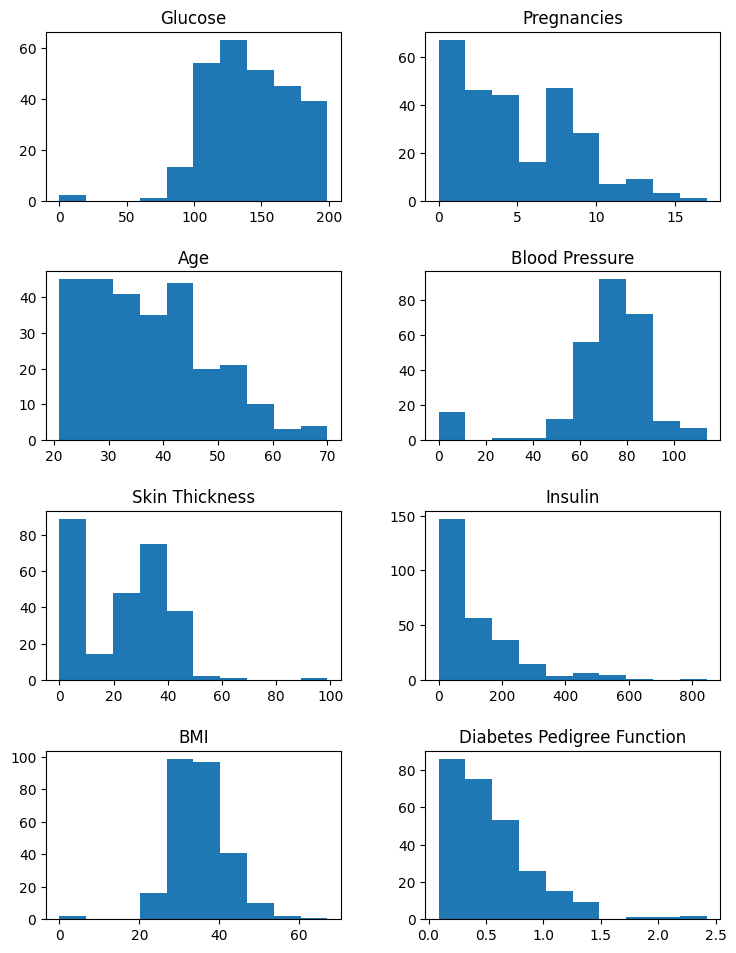

In [17]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(data.Age[data.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(data.BloodPressure[data.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(data.SkinThickness[data.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(data.Insulin[data.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(data.BMI[data.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(data.DiabetesPedigreeFunction[data.Outcome==1]);

In [18]:
# correlation matrix between columns

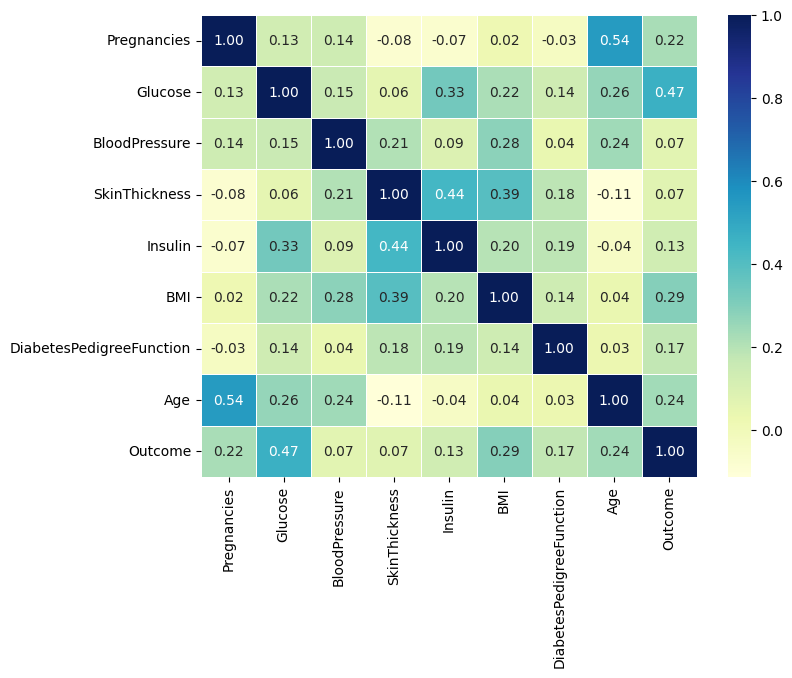

In [19]:
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f",cmap="YlGnBu")

# Training and Modeling

In [20]:
#random data shuffelin

In [21]:
data.sample(frac=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,0
106,1,96,122,0,0,22.4,0.207,27,0
270,10,101,86,37,0,45.6,1.136,38,1
435,0,141,0,0,0,42.4,0.205,29,1


In [22]:
# Data Spliting

In [23]:
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
# X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(X)

StandardScaler()

In [26]:
stansardized_data = scaler.transform(X)

In [27]:
# Restoring the data to it's varaibles
X = stansardized_data
y = data['Outcome']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=2)

In [29]:
# Build an model (Random forest classifier)
clf= RandomForestClassifier()
clf.fit(X_train,y_train);
# Evaluating the model
clf = clf.score(X_test,y_test)

In [30]:
# Build an model (Support Vector Machine)
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
# Evaluating the model
svm = svm.score(X_test,y_test)

In [31]:
# Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
# Evaluating the model
log_reg = log_reg.score(X_test,y_test)

In [32]:
# Build an model (K-Nearest Neighbors )
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
# Evaluating the model
knn = knn.score(X_test,y_test)

Random forest classifier :  0.7337662337662337
Support Vector Machine :  0.7727272727272727
Logistic Regression :  0.7597402597402597
K-Nearest Neighbors  :  0.7207792207792207


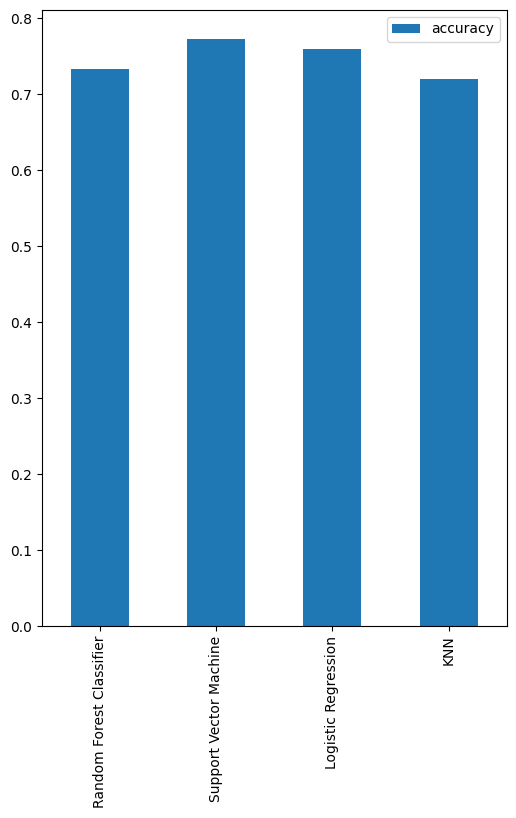

In [33]:
model_compare = pd.DataFrame({"Random Forest Classifier":clf,
"Support Vector Machine":svm,
"Logistic Regression":log_reg,
"KNN":knn,},
index=["accuracy"])
model_compare.T.plot.bar(figsize=(6,8));
print('Random forest classifier : ', clf)
print('Support Vector Machine : ', svm)
print('Logistic Regression : ', log_reg)
print('K-Nearest Neighbors  : ', knn)

# We noticed that both Support Vector and Logistic Reg has the highest accuracy.
However, let's use Support Vector Machine for our prediction

# Model Evaluation

In [34]:
svm_model = SVC(kernel='linear')

In [35]:
# Training the suppport vector Machine Classifier
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [36]:
X = scaler.transform(X)

In [38]:
# Accuracy score on the training Data
X_train_prediction = svm_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [39]:
print('Accuracy score of the training data: ', training_data_accuracy)

Accuracy score of the training data:  0.7866449511400652


In [41]:
# Accuracy score on the test Data
X_test_prediction = svm_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [42]:
print('Accuracy score of the test data: ', test_data_accuracy)

Accuracy score of the test data:  0.7727272727272727


In [43]:
import pickle
filename = 'diabetes-svm-model.pkl'
pickle.dump(svm_model, open(filename, "wb"))